### P-test

In [65]:
import numpy as np
import matplotlib.pyplot as plt

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,  3.,  4.,  7.,  8.,  8.,
         6.,  8.,  6., 12.,  6.,  5.,  3.,  5.,  3.,  0.,  2.,  2.,  1.,
         2.,  0.,  0.,  2.]),
 array([0.18811822, 0.19801081, 0.20790339, 0.21779597, 0.22768855,
        0.23758114, 0.24747372, 0.2573663 , 0.26725888, 0.27715147,
        0.28704405, 0.29693663, 0.30682921, 0.3167218 , 0.32661438,
        0.33650696, 0.34639954, 0.35629213, 0.36618471, 0.37607729,
        0.38596987, 0.39586246, 0.40575504, 0.41564762, 0.42554021,
        0.43543279, 0.44532537, 0.45521795, 0.46511054, 0.47500312,
        0.4848957 ]),
 <a list of 30 Patch objects>)

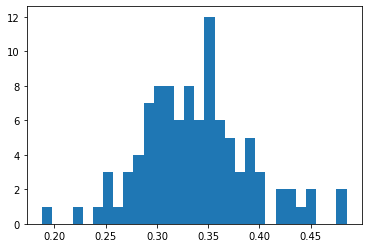

In [66]:
n = 100

beta_1 = np.random.beta(a = 20,b = 40,size = n)
plt.hist(beta_1,bins = 30)

In [67]:
def variance(dist):
    mean = np.mean(dist)
    variance = np.mean((dist-mean)**2)
    return variance

In [68]:
def sample_dist(m,dist):
    sample_dist = []
    for i in range(10000):
        sample = np.random.choice(dist,m,replace = True)
        mean_sample = np.mean(sample)
        sample_dist.append(mean_sample)
        
    return sample_dist

In [7]:
stds = dict()
stds_theor = dict()
for i in range(1,40):
    stds[i*5] = np.sqrt(variance(sample_dist(i*5,beta_1)))
    stds_theor[i*5] = np.sqrt(variance(beta_1)) / np.sqrt(i*5)

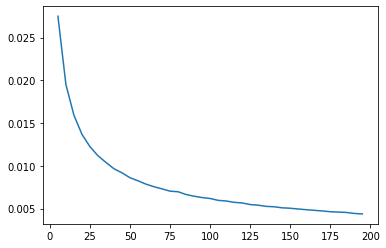

In [8]:
plt.plot(list(stds.keys()), list(stds.values()))

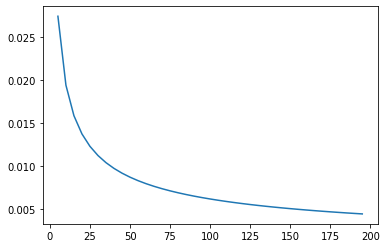

In [9]:
plt.plot(list(stds_theor.keys()), list(stds_theor.values()))

In [10]:
sample_mean =sample_dist(80,beta_1)

(array([   7.,   34.,  170.,  444.,  944., 1550., 1938., 1945., 1427.,
         898.,  413.,  167.,   47.,   14.,    2.]),
 array([0.32403543, 0.32756055, 0.33108567, 0.3346108 , 0.33813592,
        0.34166104, 0.34518617, 0.34871129, 0.35223641, 0.35576154,
        0.35928666, 0.36281178, 0.36633691, 0.36986203, 0.37338715,
        0.37691228]),
 <a list of 15 Patch objects>)

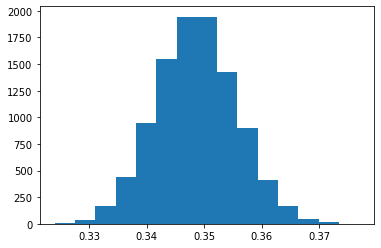

In [11]:
plt.hist(sample_mean,bins = 15)

In [103]:
beta_2 = np.random.beta(a = 20,b = 40,size = n)

In [70]:
sample_mean_1 = sample_dist(80,beta_1)
sample_mean_2 = sample_dist(80,beta_2)

(array([   8.,   36.,   97.,  351.,  749., 1419., 1921., 1955., 1652.,
        1035.,  499.,  210.,   54.,   12.,    2.]),
 array([0.30607318, 0.30946506, 0.31285695, 0.31624884, 0.31964072,
        0.32303261, 0.3264245 , 0.32981639, 0.33320827, 0.33660016,
        0.33999205, 0.34338393, 0.34677582, 0.35016771, 0.35355959,
        0.35695148]),
 <a list of 15 Patch objects>)

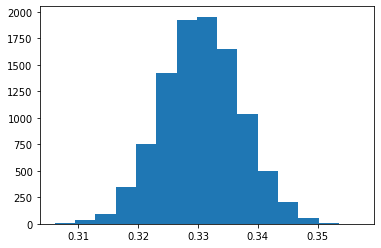

In [14]:
plt.hist(sample_mean_2,bins = 15)

In [71]:
np.mean(sample_mean_1)

0.3375818778923952

In [16]:
np.mean(beta_1)

0.3485704390353685

In [17]:
np.mean(sample_mean_2)

0.3305714260148402

In [18]:
np.mean(beta_2)

0.33053293856054644

In [ ]:
beta_1_2 = np.concatenate([sample_mean_1,sample_mean_2])
beta_1_2 =  np.random.choice(beta_1_2,len(beta_1_2),replace = False)
sample_g_1 = beta_1_2[:len(beta_1_2)//2]
sample_g_2 = beta_1_2[len(beta_1_2)//2:]
sample_mean_g1 = np.array(sample_dist(80,sample_g_1))
sample_mean_g2 = np.array(sample_dist(80,sample_g_2))
sample_diffs = sample_mean_g1 - sample_mean_g2

In [112]:
sample_mean_1_2 = np.concatenate([sample_mean_1,sample_mean_2])
sample_mean_1_2 = np.random.choice(sample_mean_1_2,len(sample_mean_1_2),replace = False)
sample_g_1 = sample_mean_1_2[:len(sample_mean_1_2)//2]
sample_g_2 = sample_mean_1_2[len(sample_mean_1_2)//2:]
sample_g_1 = np.random.choice(sample_mean_1,10**5,replace = True)
sample_g_2 = np.random.choice(sample_mean_2,10**5,replace = True)
sample_diffs = sample_g_1 - sample_g_2

In [104]:
sample_diffs = list()
for i in range(10000):
    beta_1_2 = np.concatenate([beta_1,beta_2])
    beta_1_2 =  np.random.choice(beta_1_2,len(beta_1_2),replace = False)
    sample_g_1 = beta_1_2[:len(beta_1_2)//2]
    sample_g_2 = beta_1_2[len(beta_1_2)//2:]
    sample_diffs.append(np.mean(sample_g_1) - np.mean(sample_g_2))
sample_diffs = np.array(sample_diffs)

(array([5.5000e+01, 6.1000e+02, 4.7330e+03, 1.6871e+04, 3.0463e+04,
        2.8943e+04, 1.4116e+04, 3.7050e+03, 4.7500e+02, 2.9000e+01]),
 array([-0.03165685, -0.02447672, -0.0172966 , -0.01011648, -0.00293636,
         0.00424377,  0.01142389,  0.01860401,  0.02578413,  0.03296426,
         0.04014438]),
 <a list of 10 Patch objects>)

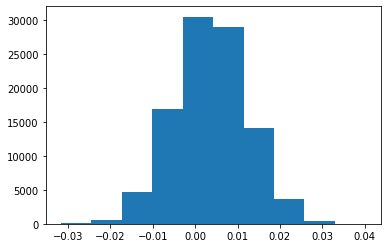

In [113]:
plt.hist(sample_diffs)

In [106]:
diff_of_means =   (np.mean(beta_1) - np.mean(beta_2))

In [107]:
diff_of_means

-0.009049213522334176

/usr/local/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 144'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


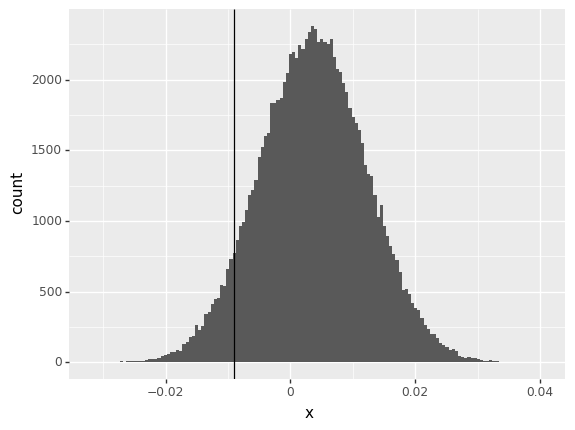

<ggplot: (309861201)>

In [114]:
from plotnine import *
import pandas as pd
ggplot(pd.DataFrame(sample_diffs).rename(columns = {0:"x"})) + geom_histogram(aes(x = "x")) + geom_vline(xintercept =diff_of_means)



In [122]:
((np.sum((np.array(sample_diffs)>0))) / len(sample_diffs))

0.664

In [121]:
from scipy.stats import ttest_ind
ttest_p_value = ttest_ind(beta_1,beta_2)[1]
ttest_p_value

0.26158440921883763

In [115]:
2*((np.sum((np.array(sample_diffs)<diff_of_means))) / len(sample_diffs))

0.138

### AUC

In [163]:
n = 1000
beta_1 = np.random.beta(a = 20,b = 40,size = n)
beta_2 = np.random.beta(a = 30,b = 40,size = n)

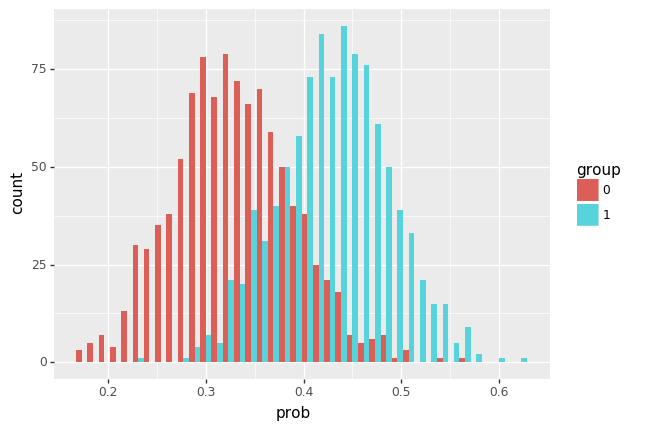

<ggplot: (311258093)>

In [164]:
beta_1 = pd.DataFrame(beta_1).rename(columns = {0:"prob"})
beta_2 = pd.DataFrame(beta_2).rename(columns = {0:"prob"})
beta_1["group"] = "0"
beta_2["group"] = "1"
betas = pd.concat([beta_1,beta_2])
ggplot(betas) + geom_histogram(aes(x = "prob",fill = "group"),position = "dodge",bins = 40)

In [165]:
betas = betas.sort_values(["prob"],ascending=False)

In [166]:
betas.loc[betas["group"]=="1","n_positive_temp"]  =1
betas.loc[betas["group"]=="0","n_positive_temp"]  =0
betas["n_positive"] = betas["n_positive_temp"].cumsum()
betas.loc[betas["group"]=="0","n_negative_temp"]  =1
betas.loc[betas["group"]=="1","n_negative_temp"]  =0
betas["n_negative"] = betas["n_negative_temp"].cumsum()

In [167]:
betas["true_positive"] = 1-betas["n_positive"] / n
betas["false_positive"] = 1-betas["n_negative"] / n

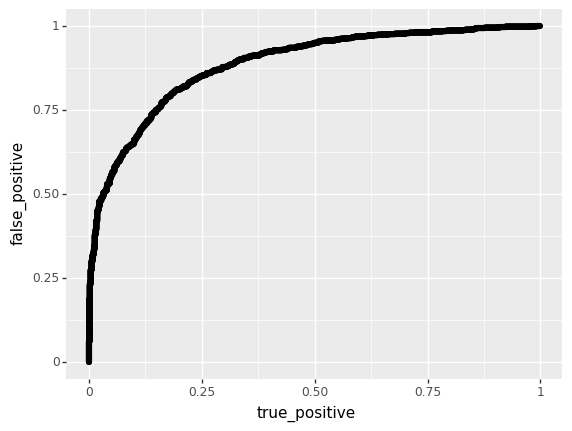

<ggplot: (311213521)>

In [168]:
ggplot(betas) + geom_point(aes(x = "true_positive",y = "false_positive"))